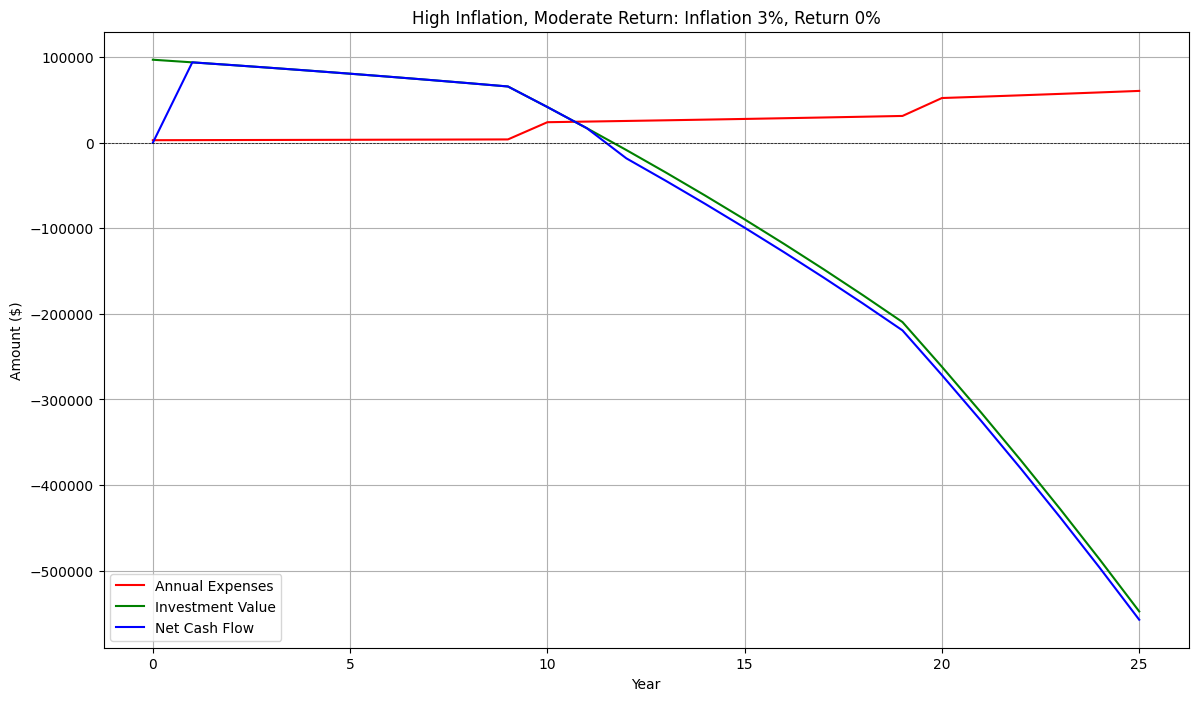

High Inflation, Moderate Return: Inflation 3%, Return 0%
Positive Years: 11
Recommendation: Downsizing may not be a good idea as the net cash flow turns negative early. Explore alternative strategies to ensure financial stability.



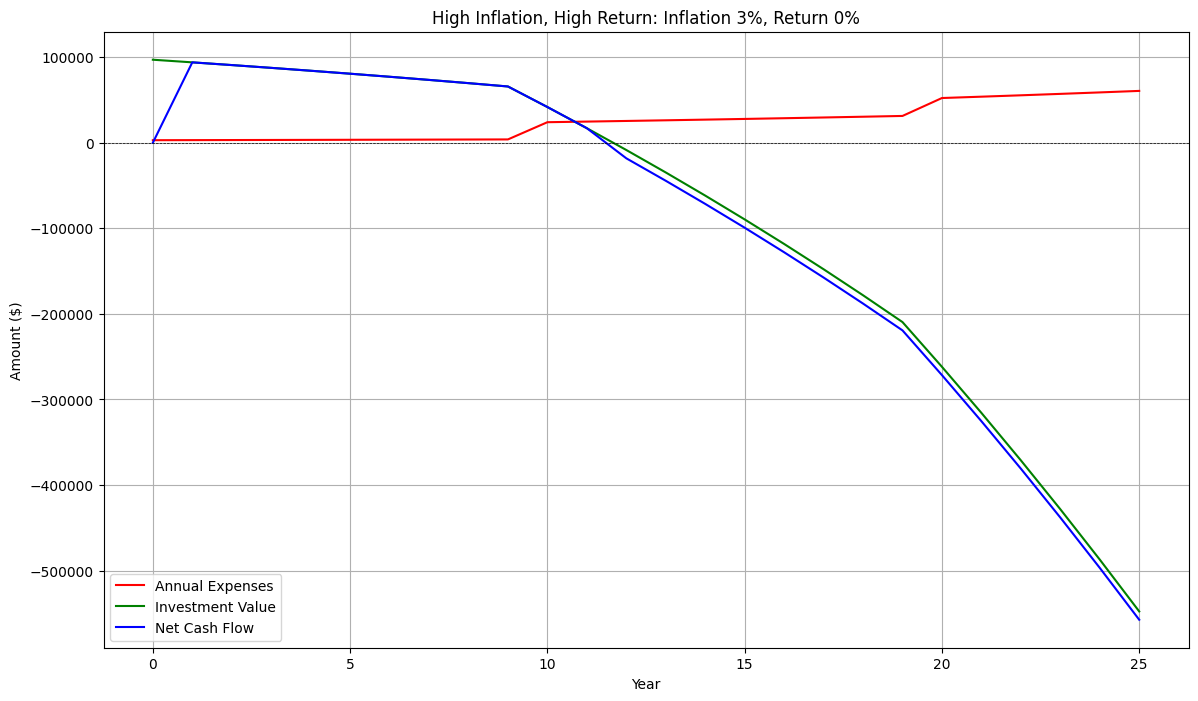

High Inflation, High Return: Inflation 3%, Return 0%
Positive Years: 11
Recommendation: Downsizing may not be a good idea as the net cash flow turns negative early. Explore alternative strategies to ensure financial stability.



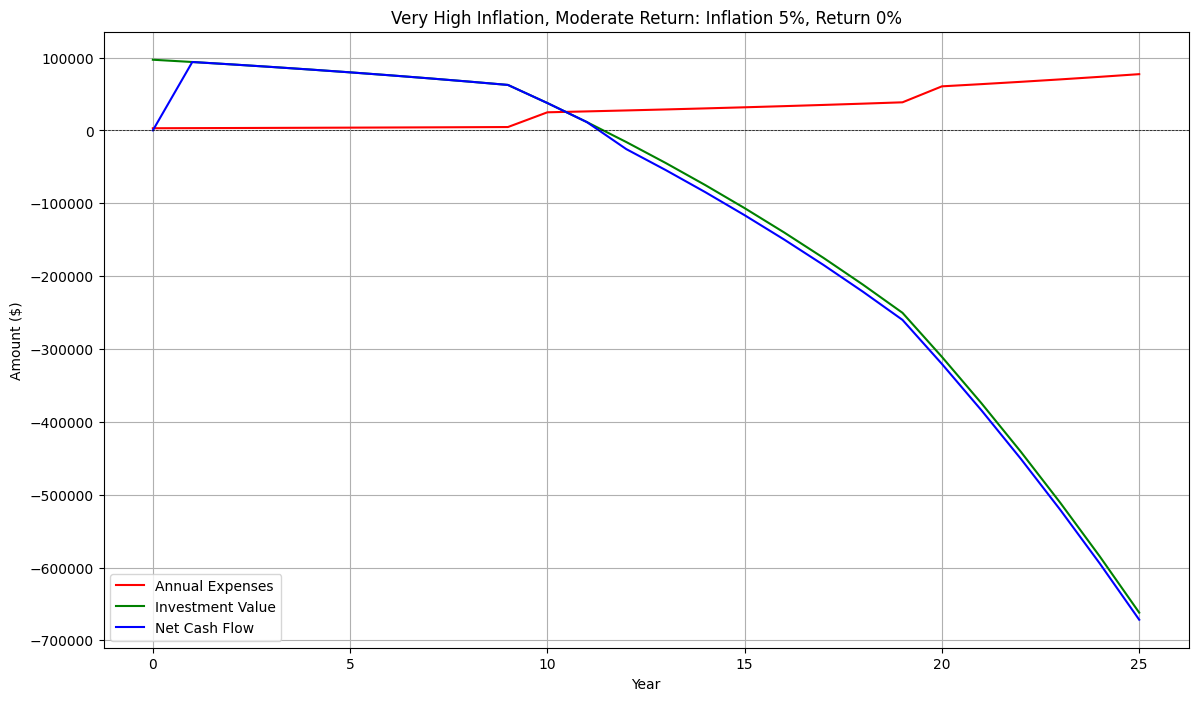

Very High Inflation, Moderate Return: Inflation 5%, Return 0%
Positive Years: 11
Recommendation: Downsizing may not be a good idea as the net cash flow turns negative early. Explore alternative strategies to ensure financial stability.



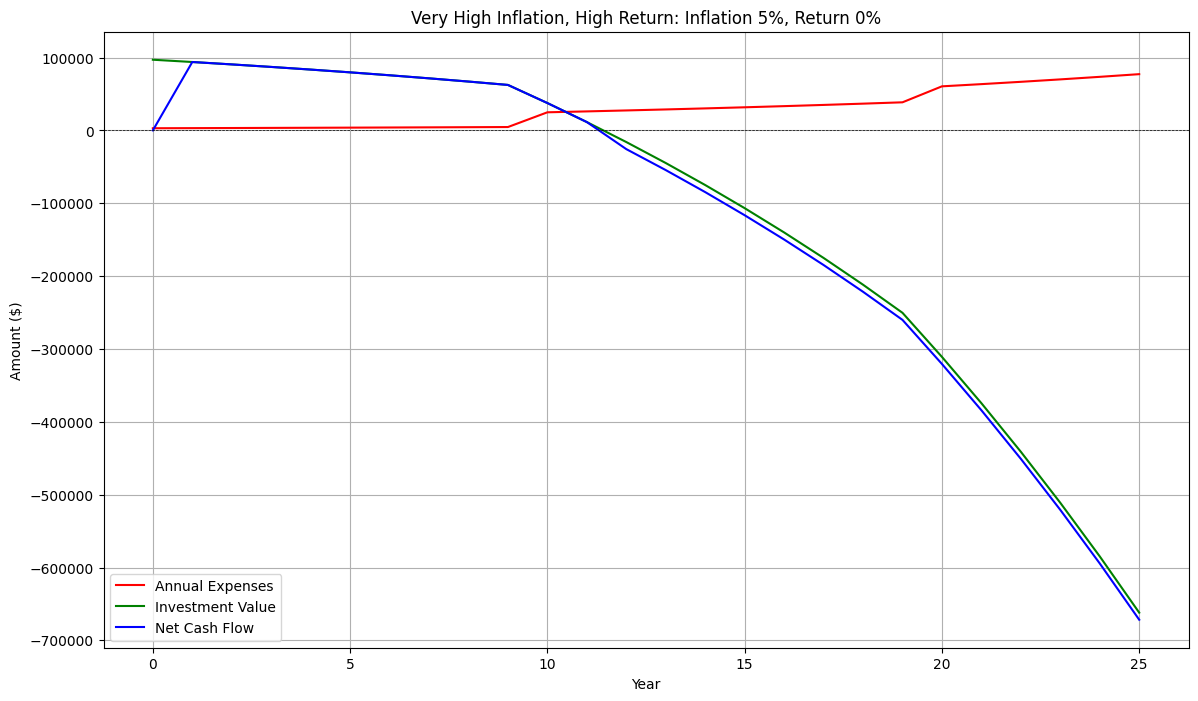

Very High Inflation, High Return: Inflation 5%, Return 0%
Positive Years: 11
Recommendation: Downsizing may not be a good idea as the net cash flow turns negative early. Explore alternative strategies to ensure financial stability.



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the initial parameters
initial_revenue = 1540.00
initial_expenses = 2688.93  # 30% more than revenue
hoa_fees = 300.0
time_horizon_years = 25
buffer_percentage = 0.1  # 10% buffer for unexpected expenses
sudden_expense_years = [10, 20, 30]  # Years when large expenses occur
sudden_expense_amount = 20000.0  # Large expense amount

# Function to simulate financial analysis
def simulate_financial_analysis(inflation_rate, investment_return_rate, buffer_percentage, sudden_expense_years, sudden_expense_amount, initial_revenue, initial_expenses, hoa_fees, home_value, new_home_value):
    net_cash_from_downsizing = home_value - new_home_value - home_value * 0.06  # Subtracting 6% selling fee
    years = np.arange(0, time_horizon_years + 1)
    expenses = np.zeros(time_horizon_years + 1)
    investment_value = np.zeros(time_horizon_years + 1)
    net_cash_flow = np.zeros(time_horizon_years + 1)
    
    # Initial values
    expenses[0] = initial_expenses + hoa_fees
    investment_value[0] = net_cash_from_downsizing
    
    # Calculate expenses, investment value, and net cash flow over time
    for year in range(1, time_horizon_years + 1):
        expenses[year] = expenses[year - 1] * (1 + inflation_rate)
        
        if year in sudden_expense_years:
            expenses[year] += sudden_expense_amount
        
        investment_value[year] = investment_value[year - 1] * (1 + investment_return_rate) - expenses[year]
        net_cash_flow[year] = investment_value[year]
        
        # Maintain buffer for unexpected expenses
        if investment_value[year] < buffer_percentage * net_cash_from_downsizing:
            net_cash_flow[year] = investment_value[year] - (buffer_percentage * net_cash_from_downsizing)
    
    # Create a DataFrame for visualization
    df = pd.DataFrame({
        'Year': years,
        'Expenses': expenses,
        'Investment Value': investment_value,
        'Net Cash Flow': net_cash_flow
    })
    
    return df

# Function to plot the results
def plot_financial_analysis(df, title):
    plt.figure(figsize=(14, 8))
    plt.plot(df['Year'], df['Expenses'], label='Annual Expenses', color='red')
    plt.plot(df['Year'], df['Investment Value'], label='Investment Value', color='green')
    plt.plot(df['Year'], df['Net Cash Flow'], label='Net Cash Flow', color='blue')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Amount ($)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to evaluate the scenario and provide recommendations
def evaluate_scenario(df):
    # Check the number of years the net cash flow remains positive
    positive_years = (df['Net Cash Flow'] > 0).sum()
    total_years = len(df['Year'])
    
    recommendation = ""
    if positive_years == total_years:
        recommendation = "Based on the analysis, downsizing is a good idea as the net cash flow remains positive for the entire duration."
    elif positive_years >= total_years // 2:
        recommendation = "Downsizing might be a viable option, but consider additional income sources or reducing expenses to improve financial stability."
    else:
        recommendation = "Downsizing may not be a good idea as the net cash flow turns negative early. Explore alternative strategies to ensure financial stability."
    
    return positive_years, recommendation

# Define key scenarios for higher inflation rates
key_scenarios = [
    (0.03, 0.00, 'High Inflation, Moderate Return: Inflation 3%, Return 0%'),
    (0.03, 0.00, 'High Inflation, High Return: Inflation 3%, Return 0%'),
    (0.05, 0.00, 'Very High Inflation, Moderate Return: Inflation 5%, Return 0%'),
    (0.05, 0.00, 'Very High Inflation, High Return: Inflation 5%, Return 0%')
]

# Parameters for simulations
initial_revenue = 1540.00
initial_expenses = 2688.93  # 30% more than revenue
debt = 84000
hoa_fees = 300.0
home_value = 400000 - debt 
new_home_value = 200000

# Run simulations and plot results
for inflation_rate, investment_return_rate, title in key_scenarios:
    df = simulate_financial_analysis(inflation_rate, investment_return_rate, buffer_percentage, sudden_expense_years, sudden_expense_amount, initial_revenue, initial_expenses, hoa_fees, home_value, new_home_value)
    plot_financial_analysis(df, title)
    positive_years, recommendation = evaluate_scenario(df)
    print(f"{title}\nPositive Years: {positive_years}\nRecommendation: {recommendation}\n")
